In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

# Training Dataset

In [4]:
image_size = (128, 128)
batch_size = 4

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "assets/celebA/Dataset/Train",
    seed=2022,
    class_names=["Female", "Male"],
    image_size=image_size,
    batch_size=batch_size,
)

Found 160000 files belonging to 2 classes.


# Test Dataset

In [6]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "assets/celebA/Dataset/Test",
    seed=2022,
    class_names=["Female", "Male"],
    image_size=image_size,
    batch_size=batch_size,
)

Found 20001 files belonging to 2 classes.


# Validation Dataset

In [7]:
valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "assets/celebA/Dataset/Validation",
    seed=2022,
    class_names=["Female", "Male"],
    image_size=image_size,
    batch_size=batch_size,
)

Found 22598 files belonging to 2 classes.


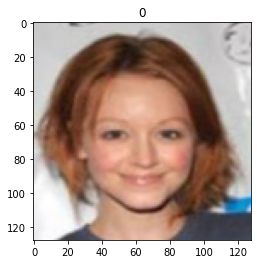

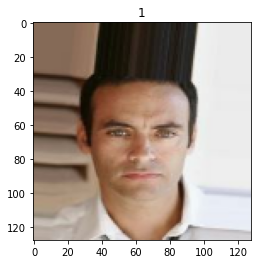

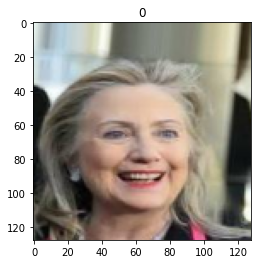

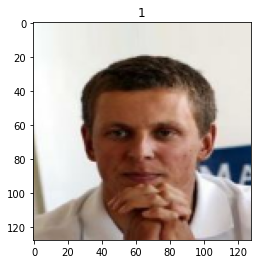

In [8]:
for img, lbl in train_ds.take(1):
    for i, l in zip(img, lbl):
        plt.imshow(i.numpy().astype("uint8"))
        plt.title(str(l.numpy()))
        plt.show()
    break

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.layers import concatenate, Rescaling
from tensorflow.keras.optimizers import Adam

In [10]:
def resblock(input_layer, filters):
    initial_layer = MaxPool2D(2)(input_layer)
    forward = Conv2D(filters, (3, 3), padding="same") (input_layer)
    forward = MaxPool2D(2)(forward)
    output_layer = concatenate([initial_layer, forward])
    return output_layer

def create_model(input_size, output_classes):
    input_layer = Input(shape=(input_size))
    forward = Rescaling(1.0 / 255)(input_layer)
    filters = 32
    
    forward = Conv2D(filters, (3, 3), padding="same", activation="relu") (forward)
    forward = MaxPool2D(2)(forward)
    
    for _ in range(4):
        forward = resblock(forward, filters)
        filters *= 2
    
    forward = Flatten()(forward)
    forward = Dense(output_classes, activation="sigmoid")(forward)
    model = Model(input_layer, forward)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss="binary_crossentropy", metrics=["acc"])
    return model

In [11]:
model = create_model(input_size=(128, 128, 3), output_classes=1)

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [14]:
checkpoint_path = 'celebA_weights/'
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
model.fit(train_ds, validation_data=valid_ds, epochs=30, shuffle=True, callbacks=[cp_callback])

Epoch 1/30
39998/40000 [============================>.] - ETA: 0s - loss: 0.0823 - acc: 0.9690
Epoch 00001: saving model to celebA_weights\
40000/40000 [==============================] - 944s 24ms/step - loss: 0.0823 - acc: 0.9690 - val_loss: 0.0702 - val_acc: 0.9729
Epoch 2/30
39999/40000 [============================>.] - ETA: 0s - loss: 0.0562 - acc: 0.9798
Epoch 00002: saving model to celebA_weights\
40000/40000 [==============================] - 945s 24ms/step - loss: 0.0562 - acc: 0.9798 - val_loss: 0.0719 - val_acc: 0.9742
Epoch 3/30
40000/40000 [==============================] - ETA: 0s - loss: 0.0371 - acc: 0.9875
Epoch 00003: saving model to celebA_weights\
40000/40000 [==============================] - 946s 24ms/step - loss: 0.0371 - acc: 0.9875 - val_loss: 0.0761 - val_acc: 0.9749
Epoch 4/30
40000/40000 [==============================] - ETA: 0s - loss: 0.0235 - acc: 0.9922
Epoch 00004: saving model to celebA_weights\
40000/40000 [==============================] - 944s 24ms

KeyboardInterrupt: 

In [ ]:
classes = {0: "Female",
          1: "Male"}

In [ ]:
for images, labels in test_ds.take(1):
    pred = model.predict(images)
    for i, r, p in zip(images, labels, pred):
        p = np.round(p[0])
        plt.imshow(i.numpy().astype("uint8"))
        plt.title(classes[p])
        plt.show()
    break